In [1]:
def function1(state):
    if isinstance(state, dict) and 'input' in state:
        return {"input": state['input'] + " from first function"}
    else:
        # Handle direct string call if necessary
        return state + " from first function"

In [101]:
def function2(state):
    if isinstance(state, dict) and 'input' in state:
        return {"input": state['input'] + " from second function"}
    else:
        return state + " from second function"

In [102]:
def function3(state):
    if isinstance(state, dict) and 'input' in state:
        return {"input": state['input'] + " from third function"}
    else:
        return state + " from third function"

In [103]:
function1("sunny")

'sunny from first function'

In [104]:
function2("kishan")

'kishan from second function'

In [105]:
from langgraph.graph import StateGraph, MessagesState
from typing import TypedDict

In [106]:
class State(TypedDict):
    input: str

In [107]:
workflow1 = StateGraph(State)

In [108]:
workflow1.add_node("fun1", function1)

In [109]:
workflow1.add_node("fun2", function2)

In [110]:
workflow1.add_edge("fun1", "fun2")

In [111]:
workflow1.set_entry_point("fun1")

In [112]:
workflow1.set_finish_point("fun2")

In [113]:
app = workflow1.compile()


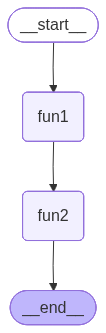

In [114]:
app

In [115]:
app.invoke({"input": "Hello, I am Elon Musk"})


{'input': 'Hello, I am Elon Musk from first function from second function'}

# case

In [127]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')
os.environ['HUGGINGFACE_API_KEY'] = os.getenv('HUGGINGFACE_API_KEY')

from langchain_huggingface import HuggingFaceEmbeddings
from langchain_groq import ChatGroq
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
model = ChatGroq(model_name="llama-3.3-70b-versatile")

e:\projects\agentic\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [128]:
def llm(input):
    output = model.invoke(input)
    return output.content

In [129]:
def token(input):
    token = input.split()
    token_num = len(token)
    return f"total token number generated is {token_num}"


In [130]:
workflow2 = StateGraph(MessagesState)

In [131]:
workflow2.add_node("my_llm", llm)

In [132]:
workflow2.add_node("llm_output_token", token)

In [133]:
workflow2.add_edge("my_llm", "llm_output_token")

In [134]:
workflow2.set_entry_point("my_llm")

In [135]:
workflow2.set_finish_point("llm_output_token")


In [136]:
app1 = workflow2.compile()

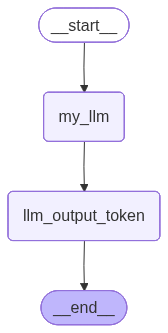

In [125]:
app1